# Część 1 - Analiza
* Na wstepie wczytajmy nasze dane 
* Nastepnie zróbmy prostą analizę zależności miedzy zmiennymi
* Zobaczmy przykład zmiennych gausowskich

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

rd = pd.read_csv('./dataset/winequality-red.csv', sep=";")
rd.attrs['title'] = "czerwone wino"
wd = pd.read_csv('./dataset/winequality-white.csv', sep=";")
wd.attrs['title'] = "białe wino"
rwd = pd.concat([rd, wd],axis=0,ignore_index=True)
rwd.attrs['title'] = "połączone wina"
red_corr = rd.corr()
white_corr = wd.corr()
rwd_corr= rwd.corr()

In [48]:
wd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [49]:
rd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
rwd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


> *Komentarz:* Istotnie, dane sa na tyle duże, że walidacja-krzyżowa (CV), nie będzie potrzebna. Danę będę zazwyczaj dzielił w propocjach 8:2 (Train:Test) 

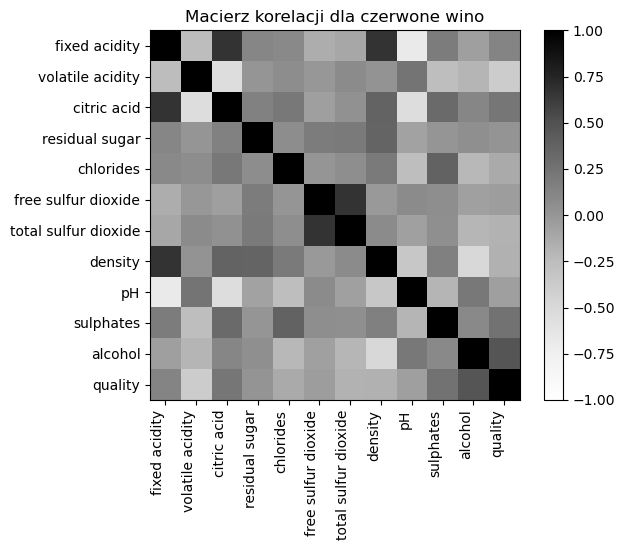

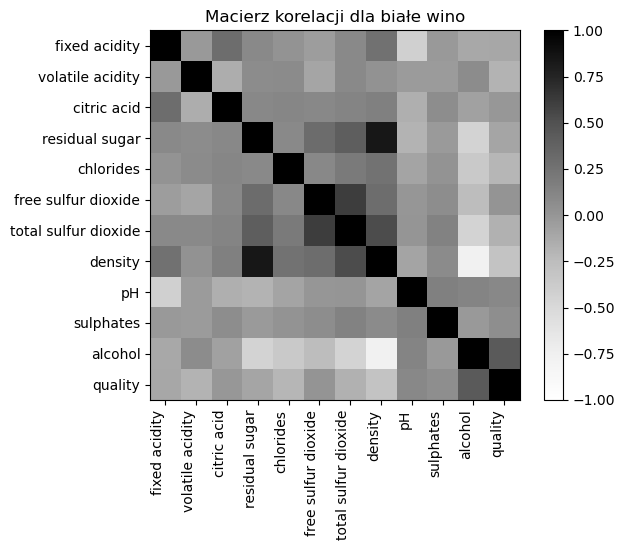

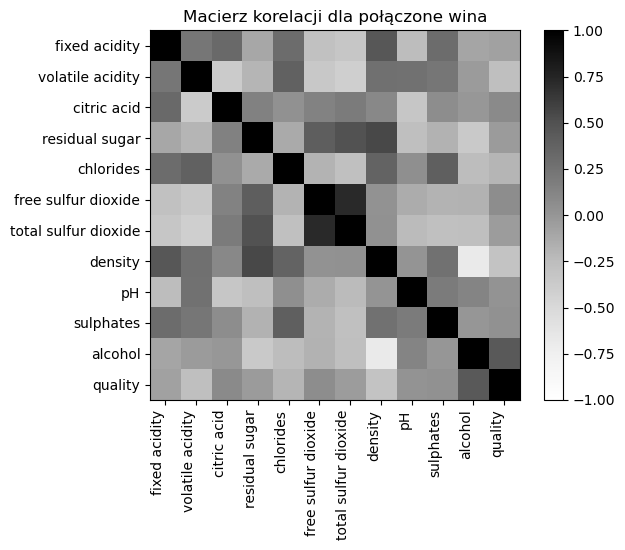

In [51]:
for x in [red_corr, white_corr, rwd_corr]:
    fig, ax = plt.subplots()
    
    divnorm = colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
    cax = ax.imshow(x, cmap='Greys', interpolation='none', norm=divnorm)
    
    ax.set_xticks(np.arange(len(x.columns)))
    ax.set_yticks(np.arange(len(x.columns)))
    ax.set_xticklabels(x.columns)
    ax.set_yticklabels(red_corr.columns)
    
    plt.title(f"Macierz korelacji dla {x.attrs['title']}")
    plt.colorbar(cax)  # Pasek kolorów
    plt.xticks(rotation=90, ha="right")
    plt.grid(False)
    plt.show()

> *Komentarz:* Istotną kwiestią jest to, że dane są dobrze skolerowane ze sobą nazwajem, później na wykresach, bedzie można zobaczyć owe zależności

## Zabaczmy najpierw zależności dla czerwonego wina

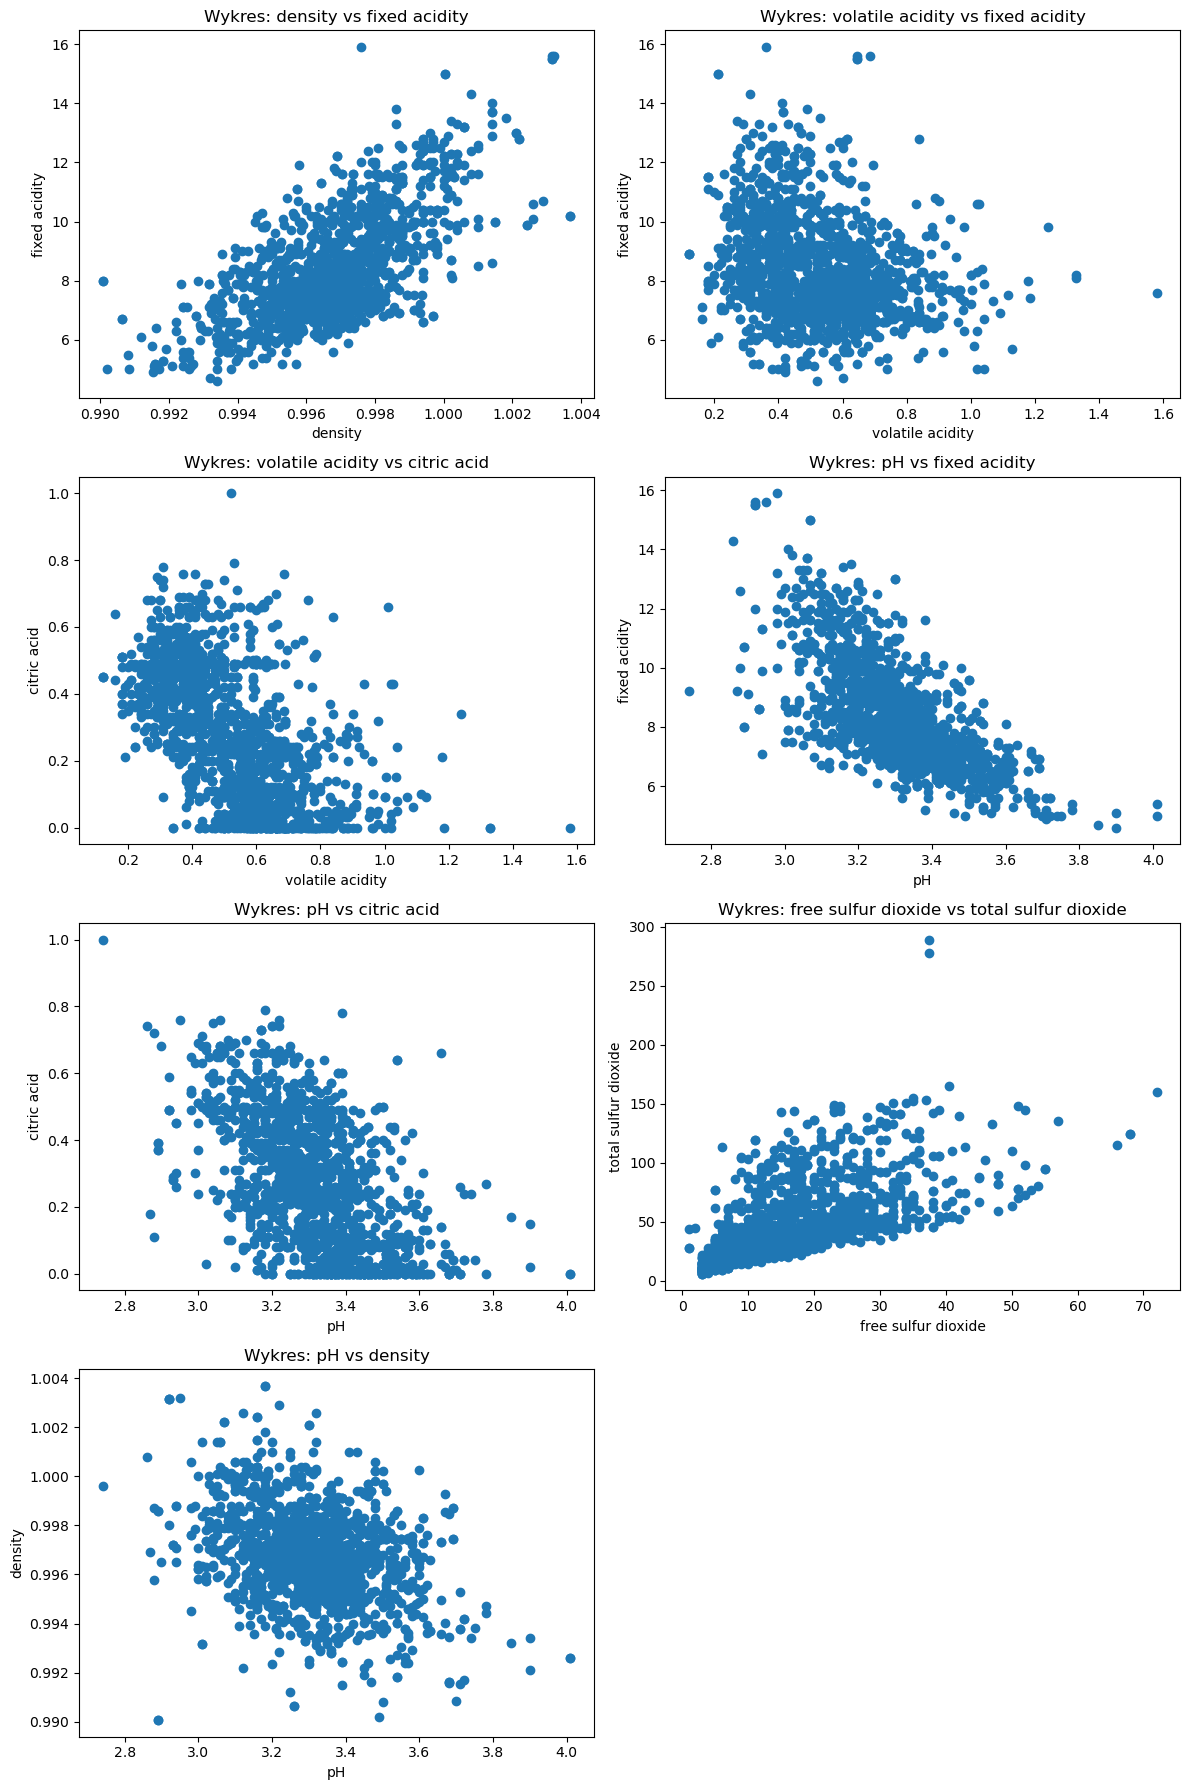

In [52]:
pairs_red = [
    (rd['density'], rd['fixed acidity']),
    (rd['volatile acidity'], rd['fixed acidity']),
    (rd['volatile acidity'], rd['citric acid']),
    (rd['pH'], rd['fixed acidity']),
    (rd['pH'], rd['citric acid']),
    (rd['free sulfur dioxide'], rd['total sulfur dioxide']),
    (rd['pH'], rd['density'])
]

fig, axs = plt.subplots(4, 2, figsize=(12, 18))
axs = axs.flatten()

for i, pair in enumerate(pairs_red):
    axs[i].scatter(pair[0], pair[1])
    axs[i].set_xlabel(pair[0].name)
    axs[i].set_ylabel(pair[1].name)
    axs[i].set_title(f'Wykres: {pair[0].name} vs {pair[1].name}')

if len(pairs_red) < len(axs):
    fig.delaxes(axs[len(pairs_red)])

plt.tight_layout()
plt.show()


> *Komentarz:* Widzimy tutaj dobrze skolerowane dane, w większości liniowo,chociaż widzimy też przykład danych, które są zależnością dwóch zmiennych gausowskich. 

## A teraz dla wina białego

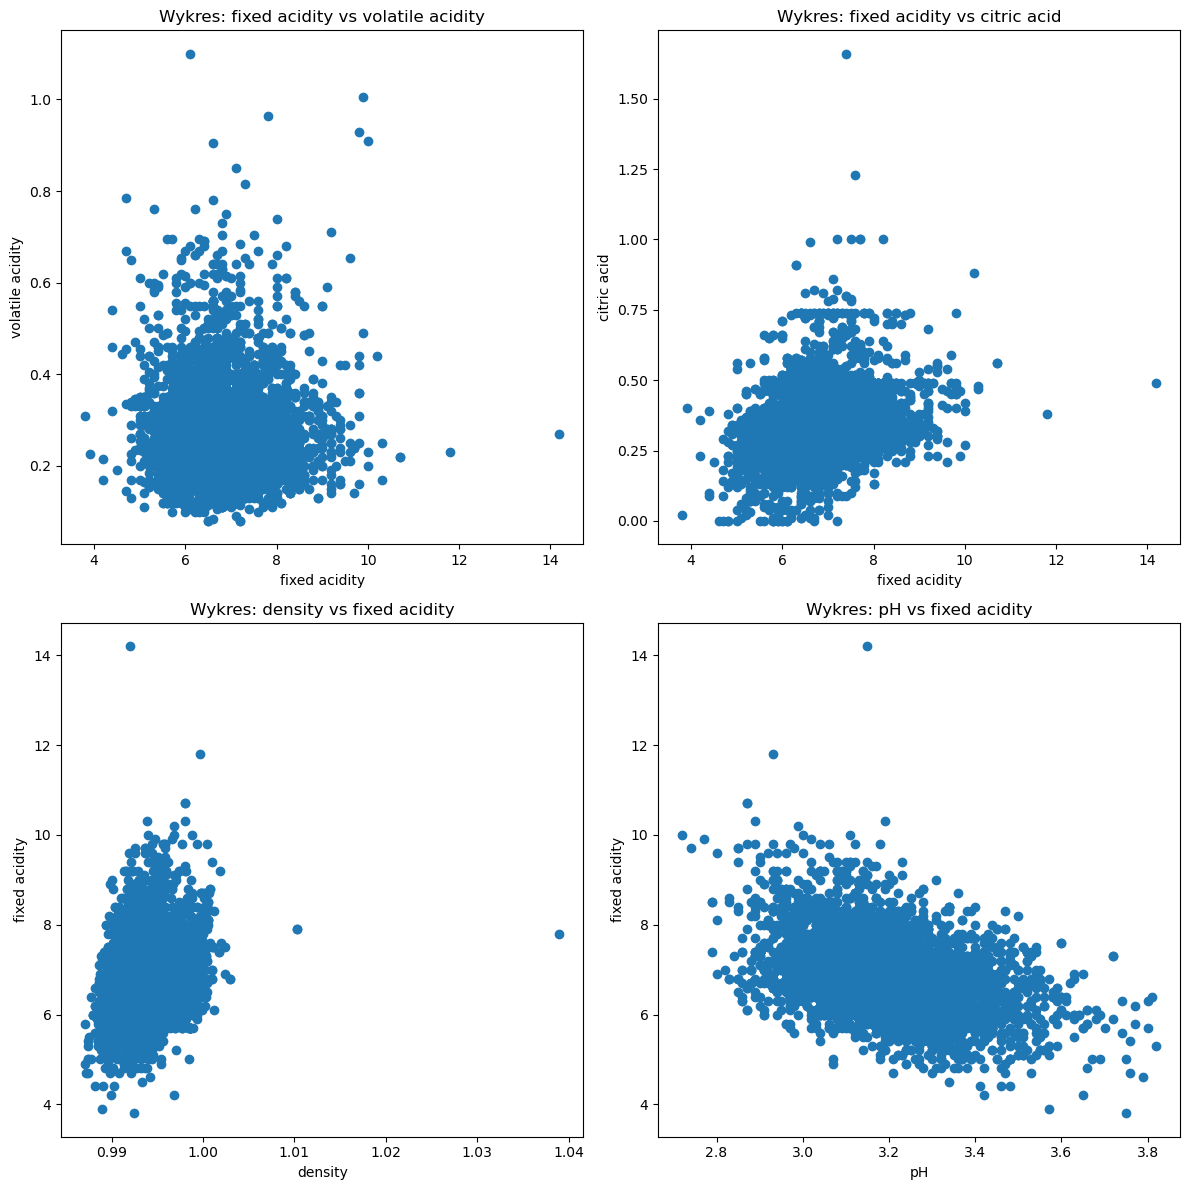

In [53]:
pairs_white = [
    (wd['fixed acidity'], wd['volatile acidity']),
    (wd['fixed acidity'], wd['citric acid']),
    (wd['density'], wd['fixed acidity']),
    (wd['pH'], wd['fixed acidity'])
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

for i, pair in enumerate(pairs_white):
    axs[i].scatter(pair[0], pair[1])
    axs[i].set_xlabel(pair[0].name)
    axs[i].set_ylabel(pair[1].name)
    axs[i].set_title(f'Wykres: {pair[0].name} vs {pair[1].name}')

if len(pairs_white) < len(axs):
    fig.delaxes(axs[len(pairs_white)])

plt.tight_layout()
plt.show()


> *Komentarz:* Widzimy podobne zależności co wyżej.

## Teraz jeszcze dwie heatmapy pokazujace ciekawe właściwości

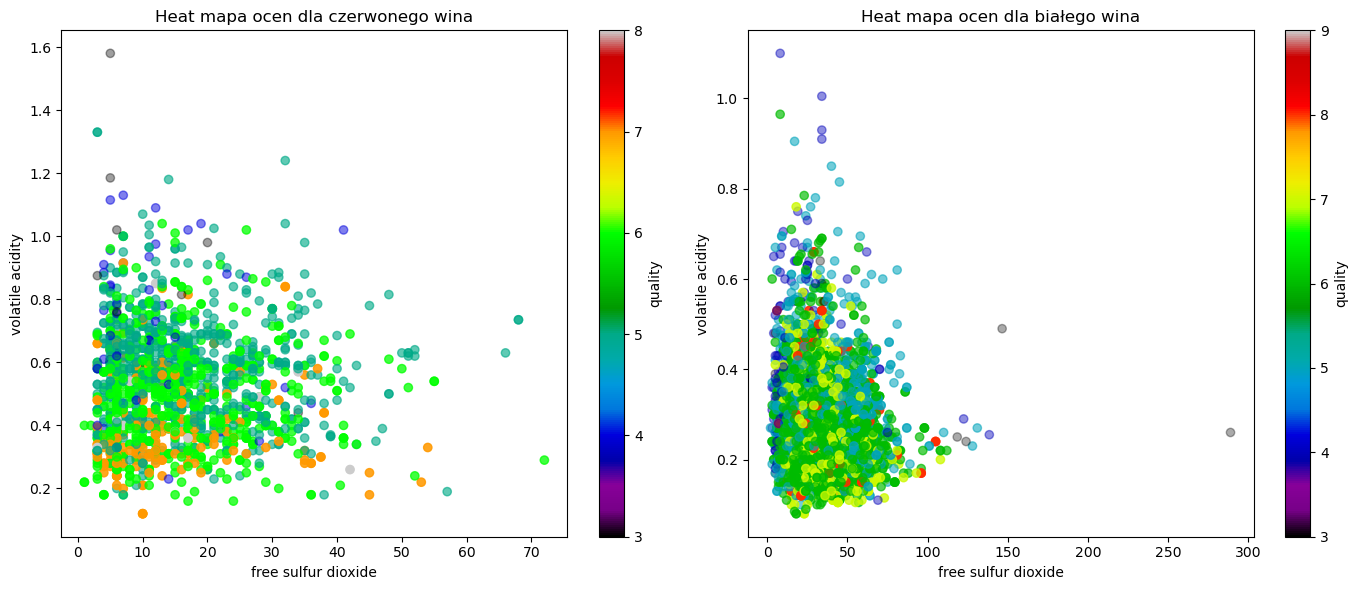

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Heatmapa dla czerwonego wina
scatter1 = axs[0].scatter(rd['free sulfur dioxide'], rd['volatile acidity'], cmap='nipy_spectral', c=rd['quality'], alpha=rd['quality']/(max(rd['quality'])))
axs[0].set_xlabel("free sulfur dioxide")
axs[0].set_ylabel("volatile acidity")
axs[0].set_title("Heat mapa ocen dla czerwonego wina")
cbar1 = fig.colorbar(scatter1, ax=axs[0])
cbar1.set_label('quality')

# Heatmapa dla białego wina
scatter2 = axs[1].scatter(wd['free sulfur dioxide'], wd['volatile acidity'], cmap='nipy_spectral', c=wd['quality'], alpha=wd['quality']/(max(wd['quality'])))
axs[1].set_xlabel("free sulfur dioxide")
axs[1].set_ylabel("volatile acidity")
axs[1].set_title("Heat mapa ocen dla białego wina")
cbar2 = fig.colorbar(scatter2, ax=axs[1])
cbar2.set_label('quality')

plt.tight_layout()

plt.show()


> *Komentarz:* Tutaj mapy pokazujące wystepowanie ocen w zależności od dwóch zmiennych skorelowanych z oceną wina

## Zmienne gausowskie dla wina czerwonego

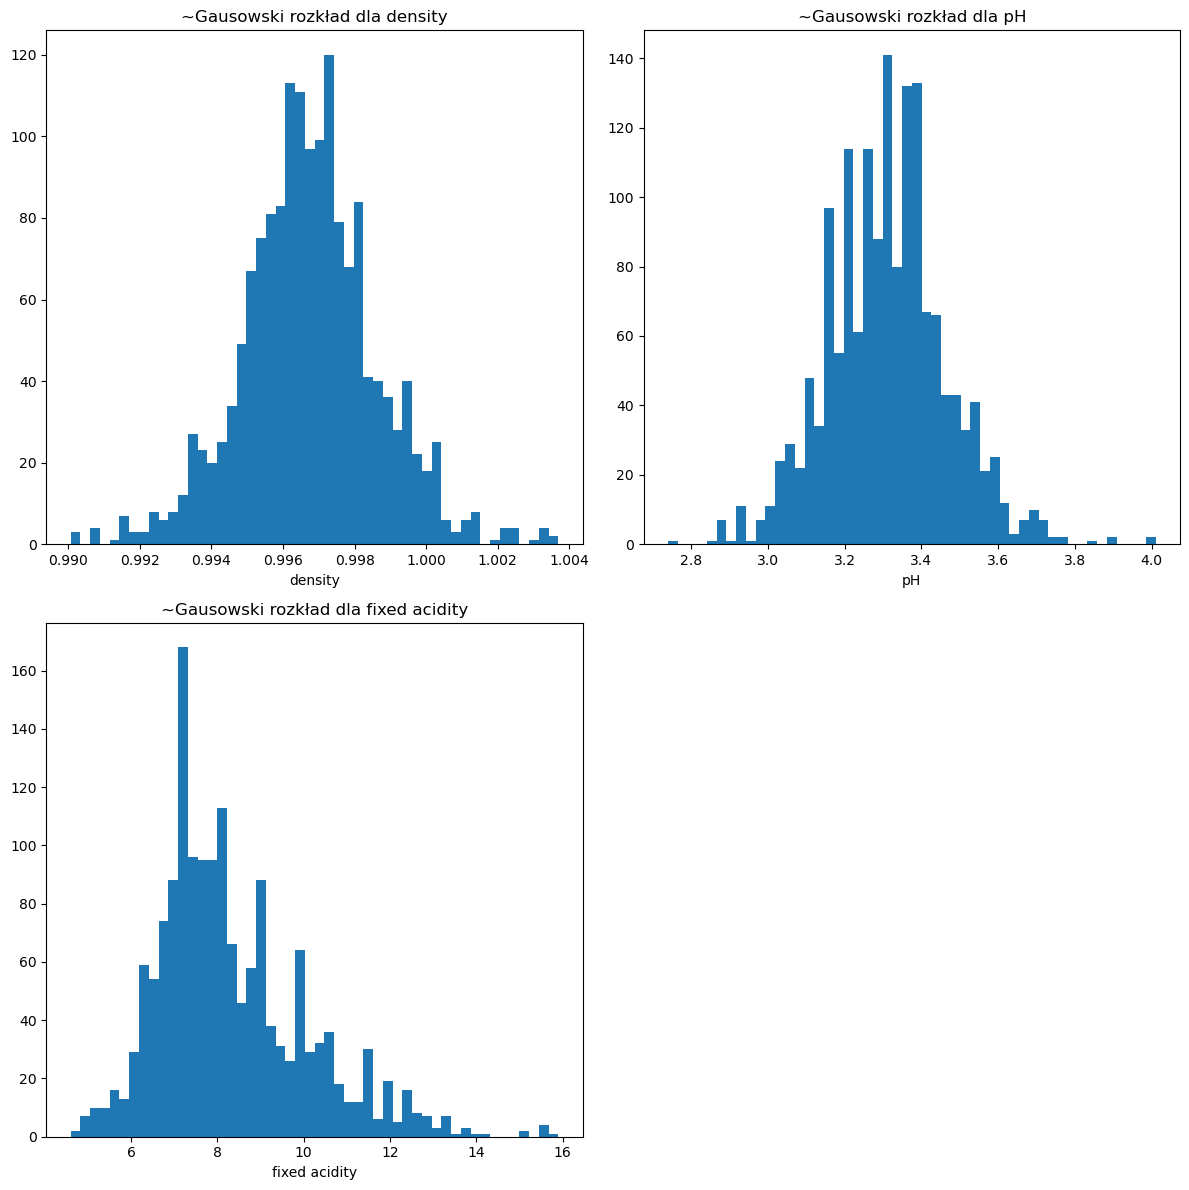

In [55]:
gausian_red = [
    rd['density'],
    rd['pH'],
    rd['fixed acidity']
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()  

for i, item in enumerate(gausian_red):
    axs[i].hist(item, bins=50)
    axs[i].set_xlabel(item.name)
    axs[i].set_title(f"~Gausowski rozkład dla {item.name}")

if len(gausian_red) < len(axs):
    fig.delaxes(axs[len(gausian_red)])

plt.tight_layout()
plt.show()

## Zmienne gausowskie dla wina białego

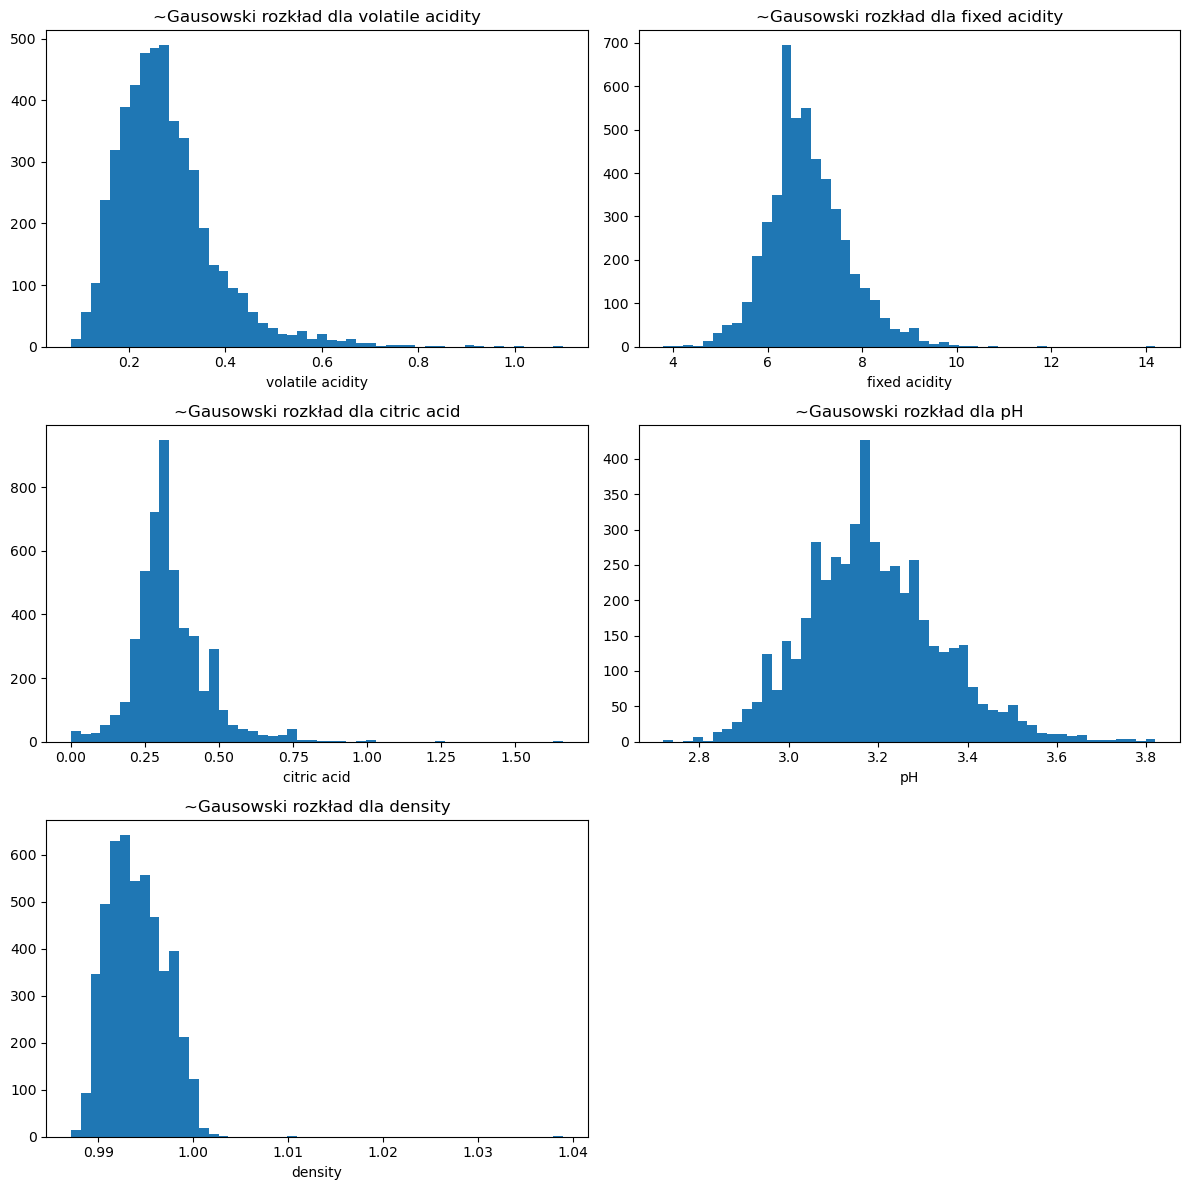

In [56]:
gausian_white = [
    wd['volatile acidity'],
    wd['fixed acidity'], 
    wd['citric acid'],
    wd['pH'], 
    wd['density']
]

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()  

for i, item in enumerate(gausian_white):
    axs[i].hist(item, bins=50)
    axs[i].set_xlabel(item.name)
    axs[i].set_title(f"~Gausowski rozkład dla {item.name}")

if len(gausian_white) < len(axs):
    fig.delaxes(axs[len(gausian_white)])

plt.tight_layout()

plt.show()

## Teraz zobaczmy jeszcze połączone bazy

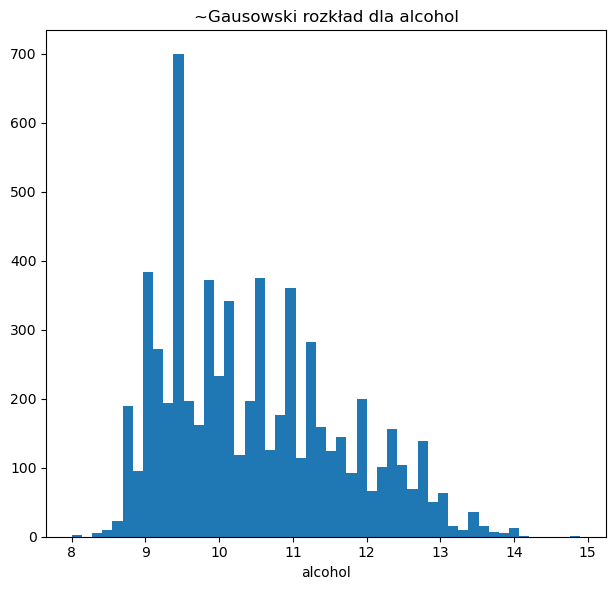

In [57]:
gausian_white = [
    rwd['alcohol']
]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs = axs.flatten()  

for i, item in enumerate(gausian_white):
    axs[i].hist(item, bins=50)
    axs[i].set_xlabel(item.name)
    axs[i].set_title(f"~Gausowski rozkład dla {item.name}")

if len(gausian_white) < len(axs):
    fig.delaxes(axs[len(gausian_white)])

plt.tight_layout()

plt.show()

> *Komentarz:* To może nie jest kształt, który przypomina rozkład Gaussa, ale tę zmienną będę w późniejszych etapach aproksymował przy użyciu regresji, co istotne to widać tutaj, że dane są dość równomiernie rozłożone, a więc proces aproksymacji powinien przebiegać w miarę prosto. 

## Zobaczmy również wykresy pudełkowe dla poszczególnych zmiennych, najpierw wino czerwone

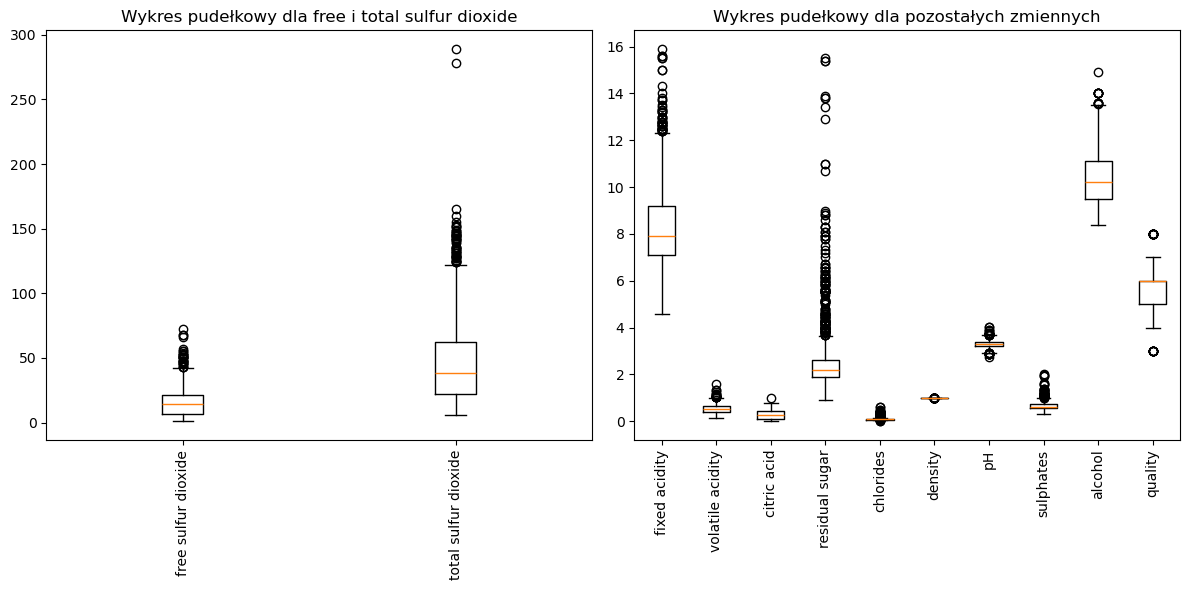

In [58]:
data1 = rd.copy()[['free sulfur dioxide','total sulfur dioxide']]
data2 = rd.copy().drop(labels=['free sulfur dioxide','total sulfur dioxide'],axis=1)

# Ustawienia dla wykresu na jednej stronie
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 rząd, 2 kolumny wykresów

# Pierwszy wykres pudełkowy dla data1
axes[0].boxplot(data1.values)
axes[0].set_xticks(range(1, len(data1.columns) + 1))
axes[0].set_xticklabels(data1.columns, rotation=90)
axes[0].set_title('Wykres pudełkowy dla free i total sulfur dioxide')

# Drugi wykres pudełkowy dla data2
axes[1].boxplot(data2.values)
axes[1].set_xticks(range(1, len(data2.columns) + 1))
axes[1].set_xticklabels(data2.columns, rotation=90)
axes[1].set_title('Wykres pudełkowy dla pozostałych zmiennych')

plt.tight_layout()  # Dopasowanie layoutu
plt.show()

## Teraz dla białego

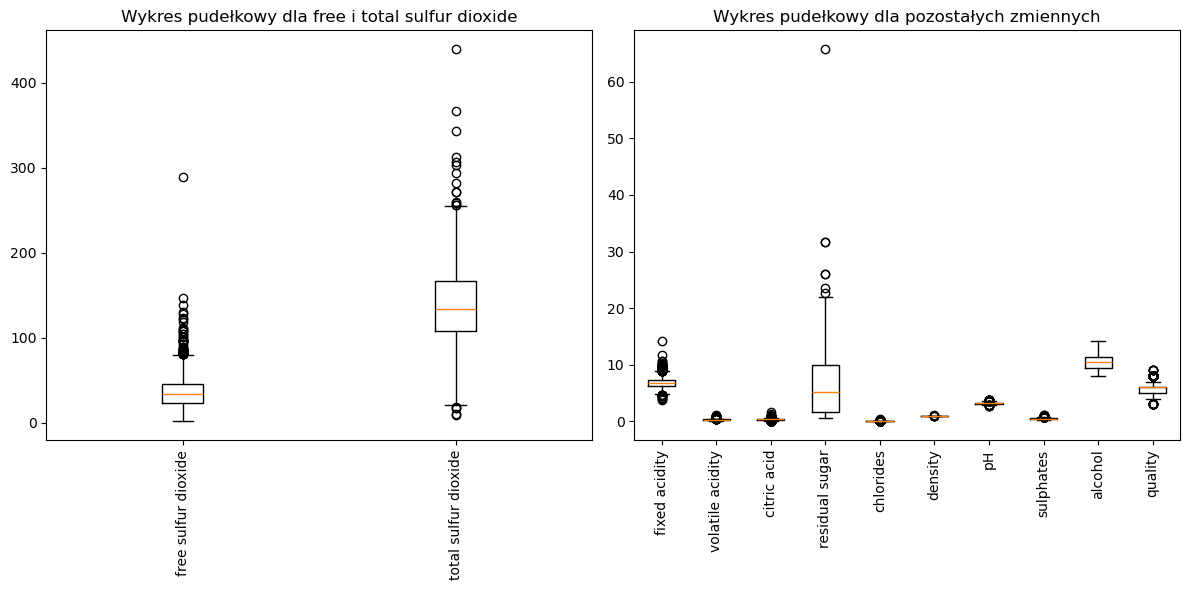

In [59]:
data1 = wd.copy()[['free sulfur dioxide','total sulfur dioxide']]
data2 = wd.copy().drop(labels=['free sulfur dioxide','total sulfur dioxide'],axis=1)

# Ustawienia dla wykresu na jednej stronie
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 rząd, 2 kolumny wykresów

# Pierwszy wykres pudełkowy dla data1
axes[0].boxplot(data1.values)
axes[0].set_xticks(range(1, len(data1.columns) + 1))
axes[0].set_xticklabels(data1.columns, rotation=90)
axes[0].set_title('Wykres pudełkowy dla free i total sulfur dioxide')

# Drugi wykres pudełkowy dla data2
axes[1].boxplot(data2.values)
axes[1].set_xticks(range(1, len(data2.columns) + 1))
axes[1].set_xticklabels(data2.columns, rotation=90)
axes[1].set_title('Wykres pudełkowy dla pozostałych zmiennych')

plt.tight_layout()  # Dopasowanie layoutu
plt.show()

## Oraz połączone bazy

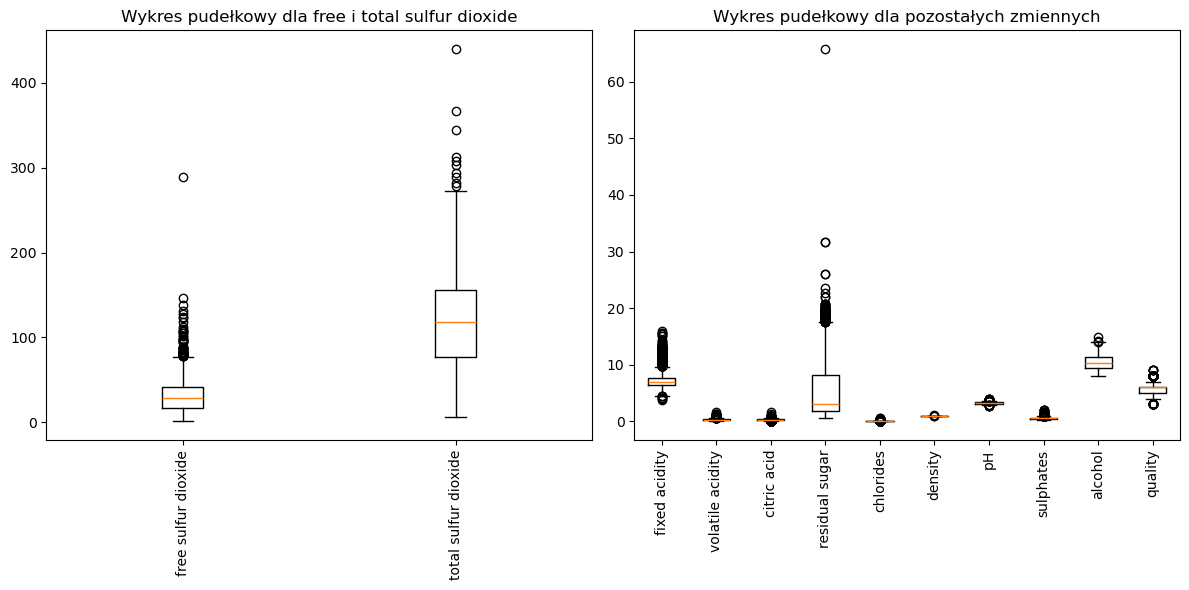

In [60]:
data1 = rwd.copy()[['free sulfur dioxide','total sulfur dioxide']]
data2 = rwd.copy().drop(labels=['free sulfur dioxide','total sulfur dioxide'],axis=1)

# Ustawienia dla wykresu na jednej stronie
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 rząd, 2 kolumny wykresów

# Pierwszy wykres pudełkowy dla data1
axes[0].boxplot(data1.values)
axes[0].set_xticks(range(1, len(data1.columns) + 1))
axes[0].set_xticklabels(data1.columns, rotation=90)
axes[0].set_title('Wykres pudełkowy dla free i total sulfur dioxide')

# Drugi wykres pudełkowy dla data2
axes[1].boxplot(data2.values)
axes[1].set_xticks(range(1, len(data2.columns) + 1))
axes[1].set_xticklabels(data2.columns, rotation=90)
axes[1].set_title('Wykres pudełkowy dla pozostałych zmiennych')

plt.tight_layout()  # Dopasowanie layoutu
plt.show()

> *Komentarz:* Istotnie z powyższych wykresów widać, że mamy kilka outlinerów od naszych danych, ale biorąc pod uwagę ich ilość nie powinny one wpływać w znaczący sposób na wynik uczenia

# Część 2 - Regresja
* zbudować model przewidujący prostą zmienna np. gęstość
* zbudować bardziej zaawansowany model, przewidujacy ilość alkoholu w winie

## Przewidywanie kwasowości na podstawie podanej podanej gęstości

In [61]:
# Sprobójmy połączyć dwa data sety
data = pd.concat(
    [pd.concat([rd.density,wd.density],axis=0),pd.concat([rd['fixed acidity'],wd['fixed acidity']], axis=0)],
    axis=1,
    ignore_index=True).rename(columns = {0:'fixed acidity',1:'density'})
x = data.density.values.reshape(-1,1)
y = data['fixed acidity'].values.reshape(-1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=48)

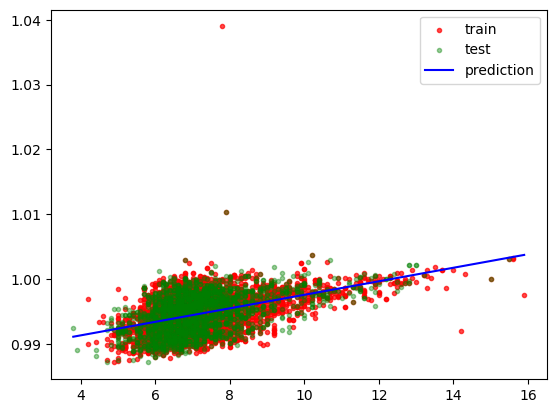

Współczynniki dla danego modelu o stopniu 1 są odpowiednie [0.0, 0.001043651019055823]


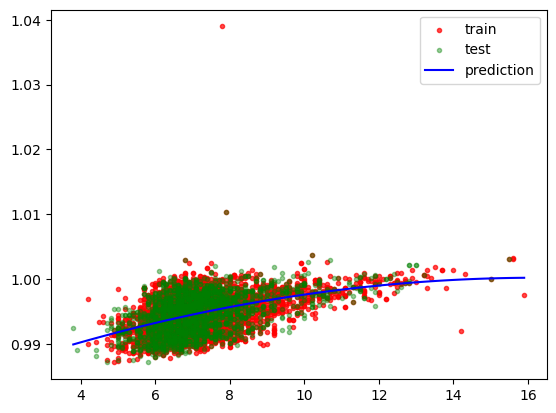

Współczynniki dla danego modelu o stopniu 2 są odpowiednie [0.0, 0.002155420003850053, -6.623770857418215e-05]


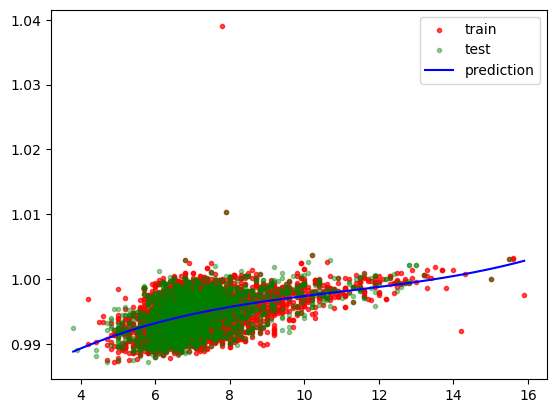

Współczynniki dla danego modelu o stopniu 3 są odpowiednie [0.0, 0.004870612174960841, -0.00037975013570686007, 1.1501397764517091e-05]


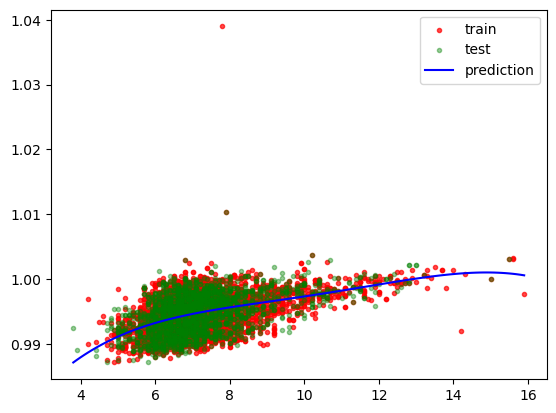

Współczynniki dla danego modelu o stopniu 4 są odpowiednie [0.0, 0.014979764090470422, -0.002106933457441567, 0.00013757472729991816, -3.312594496358595e-06]


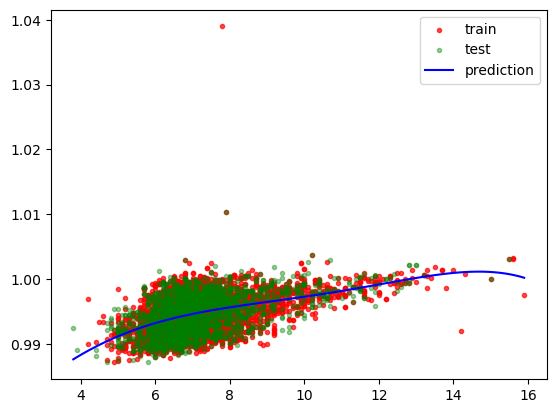

Współczynniki dla danego modelu o stopniu 5 są odpowiednie [0.0, 0.00752003372354913, -0.0003921737606113032, -5.300649631019318e-05, 6.920305194009731e-06, -2.1233054039649366e-07]


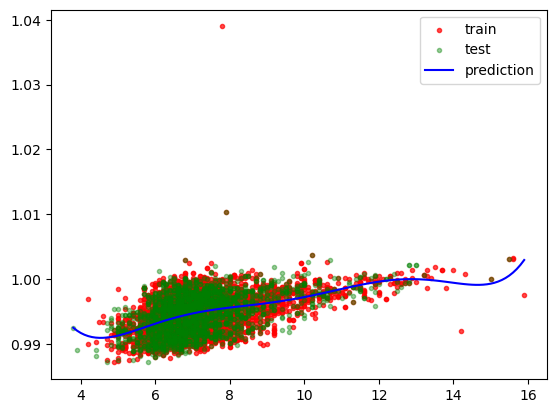

Współczynniki dla danego modelu o stopniu 6 są odpowiednie [0.0, -0.18662434349095938, 0.05616368346840231, -0.008586590898617224, 0.0007101999503078559, -3.023194605921253e-05, 5.187559598473065e-07]


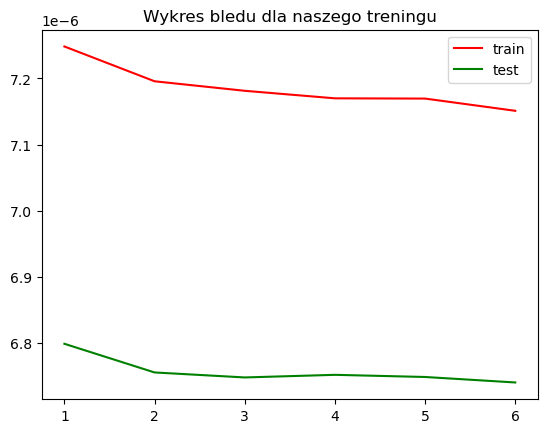

Mean squared error equals: 6.740127026100029e-06 | And polynomial order is 6


In [62]:
error_train = []
error_test = []
degree_num = 7

for degree in range(1,degree_num):

    plt.scatter(x_train,y_train,c='red',marker='.',alpha=0.7)
    plt.scatter(x_test,y_test, c='green',marker='.',alpha=0.4)
    poly = PolynomialFeatures(degree=degree)
    model = LinearRegression()
    
    x_trans_train = poly.fit_transform(x_train)
    model.fit(x_trans_train, y_train)
    
    x_plot = np.arange(x.min(), x.max(),0.1).reshape(-1,1)
    
    plt.plot(x_plot, model.predict(poly.fit_transform(x_plot)),color='blue')
    plt.legend(['train','test', 'prediction'])
    plt.show()
        
    error_train.append(mean_squared_error(model.predict(x_trans_train), y_train))
    error_test.append(mean_squared_error(model.predict(poly.fit_transform(x_test)),y_test))
    print(f"Współczynniki dla danego modelu o stopniu {degree} są odpowiednie {model.coef_.tolist()}")

plt.title("Wykres bledu dla naszego treningu")
plt.plot([i for i in range(1,degree_num)],error_train, color='red')
plt.plot([i for i in range(1,degree_num)],error_test, color='green')
plt.legend(['train','test'])
plt.show()

best = (min(error_test),error_test.index(min(error_test))+1)
print(f"Mean squared error equals: {best[0]} | And polynomial order is {best[1]}")

> *Komentarz:* Postaram się wyjaśnić tę dośc nietypową sytuację, jak widzimy, błąd testowy jest o wiele mniejszy niż błąd trenowania. Może brać się to z tąd, że dane testowe, są bliżej naszej krzywej aniżeli te trenujące (to widać, że rzeczywiście tak jest, dane testowe są trochę lepiej dopasowane). Patrząc na powyższe wykresy, możemy stwierdzić, że rzeczywiście udało nam się dość dobrze zgeneralizować zadany problem, dopasowanie jest dobre, a błąd jest mały. Spróbujmy jeszcze dopasować regresję Ridge, do tego problemu, może wynik trochę się poprawi.   

### Spróbujmy jeszcze ridge regression

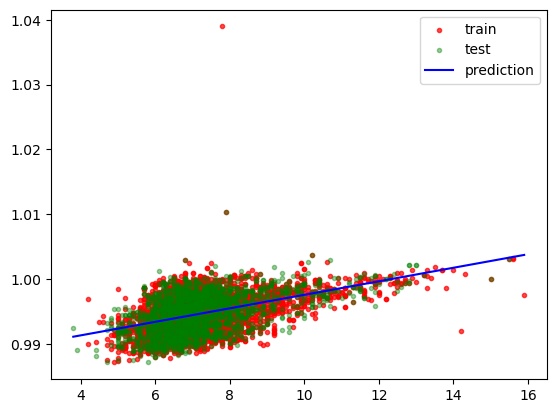

Współczynniki dla danego modelu o stopniu 1 są odpowiednie [0.0, 0.0010435091581467845]. Lambda wynosi (1, 6.798659801169607e-06)


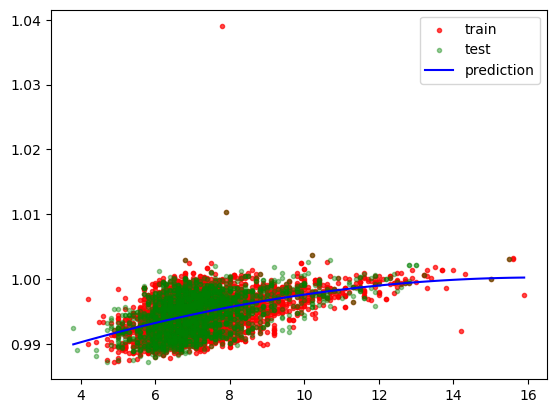

Współczynniki dla danego modelu o stopniu 2 są odpowiednie [0.0, 0.002143540210568034, -6.554728794986943e-05]. Lambda wynosi (1, 6.75528445026109e-06)


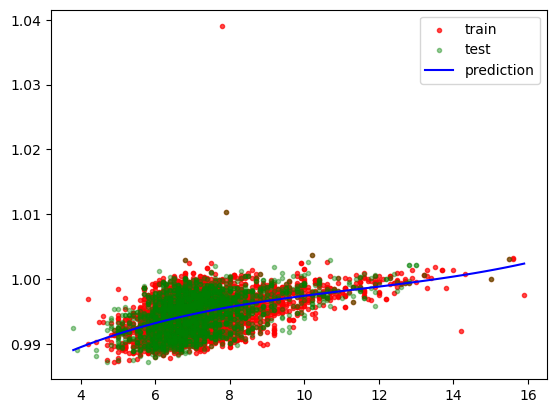

Współczynniki dla danego modelu o stopniu 3 są odpowiednie [0.0, 0.0043324642010202025, -0.0003189926916529441, 9.323797604904323e-06]. Lambda wynosi (1, 6.746800947762748e-06)


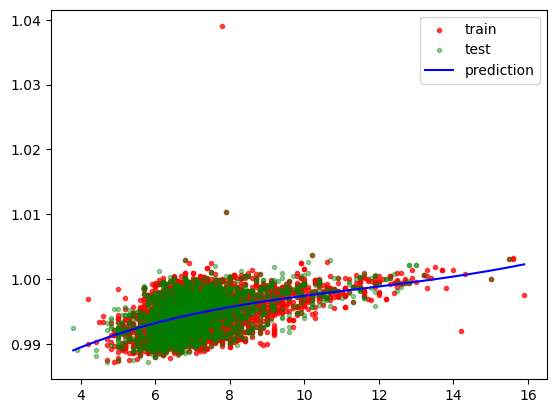

Współczynniki dla danego modelu o stopniu 4 są odpowiednie [0.0, 0.004659763993449042, -0.0003772960971926565, 1.3752106840011947e-05, -1.2072886396420429e-07]. Lambda wynosi (1, 6.746409664159396e-06)


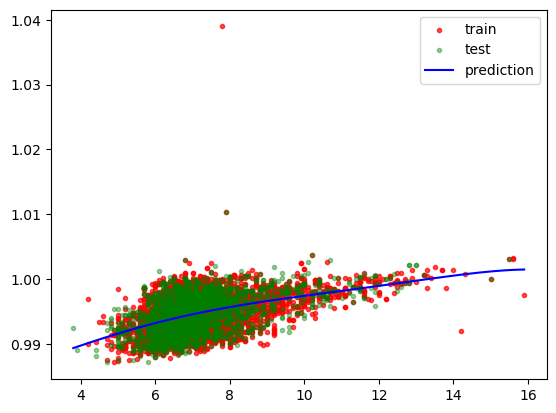

Współczynniki dla danego modelu o stopniu 5 są odpowiednie [0.0, 0.00015817638536600904, 0.0006788284853901595, -0.00010807054010328696, 6.7539878872616585e-06, -1.510452321681145e-07]. Lambda wynosi (101, 6.744518860446818e-06)


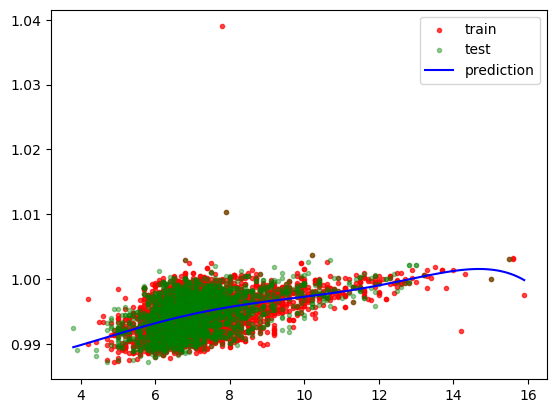

Współczynniki dla danego modelu o stopniu 6 są odpowiednie [0.0, 6.929298716575658e-06, 4.141218120200973e-05, 0.00010987995625343026, -2.249425447709978e-05, 1.6153728830555186e-06, -3.9774478997703e-08]. Lambda wynosi (2001, 6.743905644563708e-06)


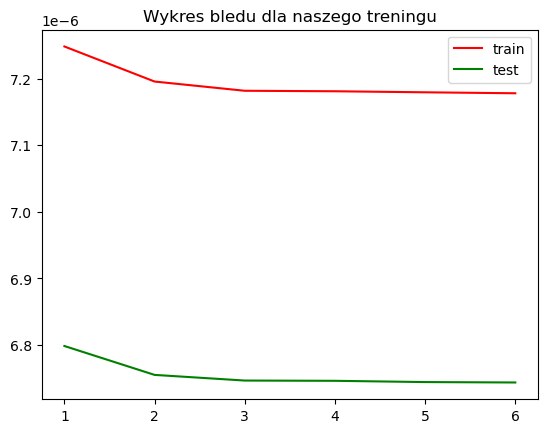

Mean squared error equals: 6.743905644563708e-06 | And polynomial order is 6


In [63]:
error_train = []
error_test = []

degree_num = 7

for degree in range(1,degree_num):
    poly = PolynomialFeatures(degree=degree)
    best_lam = (0,np.inf)
    range1 = np.arange(0.01,10,0.01)
    for lam in range(1,50000,100):
        model = Ridge(alpha=lam)
        
        x_trans_train = poly.fit_transform(x_train)
        model.fit(x_trans_train, y_train)
            
        err_tst = (mean_squared_error(model.predict(poly.fit_transform(x_test)),y_test))
        if best_lam[1] > err_tst:
            best_lam = (lam,err_tst)
            
    plt.scatter(x_train,y_train,c='red',marker='.',alpha=0.7)
    plt.scatter(x_test,y_test, c='green',marker='.',alpha=0.4)
    model = Ridge(alpha=best_lam[0])
    
    x_trans_train = poly.fit_transform(x_train)
    model.fit(x_trans_train, y_train)
        
    error_train.append(mean_squared_error(model.predict(x_trans_train), y_train))
    error_test.append(mean_squared_error(model.predict(poly.fit_transform(x_test)),y_test))
    x_plot = np.arange(x.min(), x.max(),0.1).reshape(-1,1)
    plt.plot(x_plot, model.predict(poly.fit_transform(x_plot)),color='blue')
    plt.legend(['train','test', 'prediction'])
    plt.show()
    print(f"Współczynniki dla danego modelu o stopniu {degree} są odpowiednie {model.coef_.tolist()}. Lambda wynosi {best_lam}")

    
plt.title("Wykres bledu dla naszego treningu")
plt.plot([i for i in range(1,degree_num)],error_train, color='red')
plt.plot([i for i in range(1,degree_num)],error_test, color='green')
plt.legend(['train','test'])
plt.show()

best = (min(error_test),error_test.index(min(error_test))+1)
print(f"Mean squared error equals: {best[0]} | And polynomial order is {best[1]}")

> *Komentarz:* Jak widzimy, nieznacząca poprawa. Tak naprawdę udało nam się trochę "wygładzić" naszą funkcję (widać to po wykresach oraz współczynnikach). Co istotne to algorytm wyszukiwania lambdy to tak naprawdę GridSearch tylko bez walidacji krzyżowej. Na tych danych nie trzeba używać CV(cross-validation), ponieważ zbiór danych jest duży i mamy wystarczająco dużo danych, aby móc podzielić je na zbiór trenujący oraz testowy. Co istotne również ze względu na dużą ilość danych o wiele trudniej jest overfitować naszą funkcję, a więc też między innymi dlatego ridge zdaje się, nie radzić sobie lepiej ze standardową regresją liniową.

## Spróbujmy teraz zrobić troche bardziej zaawansowany model. Skupmy sie na przewidzeniu ile alkoholu będzie w winie

In [64]:
# Setup
x = rwd.copy(deep=True)
y = x.alcohol.values
x.pop('alcohol')
x.pop('quality')

scaler = StandardScaler()

x_stand = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_stand,y, test_size=0.2, random_state=44)

> *Komentarz:* W regresji nie będę brał pod uwagę parametru 'quality', ponieważ jest on jakby składową wszystkich pozostałych parametrów. A więc też z czysto praktycznego podejścia (bo mając quality musimy też mieć również znaną już ilość alkoholu). Dane zostały również przeze mnie znormalizowane, ponieważ wtedy Lasso, jak i Ridge radzą sobie z nimi lepiej. Naturalnie nasuwa nam się do głowy pomysł, aby wykorzystać Lasso regression, mamy w końcu dużą ilość wejść, a więc może któreś z nich nie są użyteczne i należy je wyzerować?


### Lasso regression

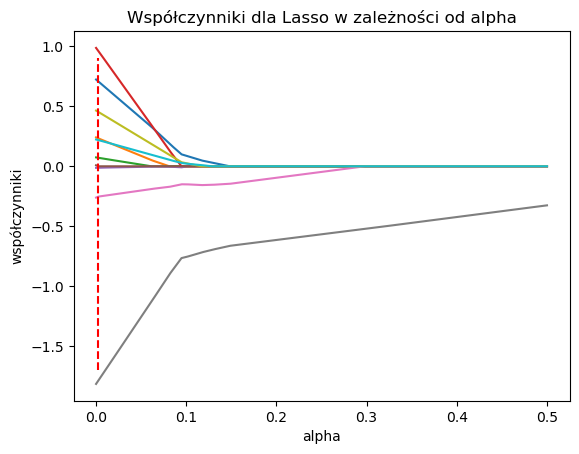

Najlepszy parametr alpha to: 0.0021000000000000003
Lista współczynników: [0.7110901748248515, 0.23451280065621496, 0.07155841821868958, 0.9674845238461035, -0.012251364616758435, 0.0014397669555377829, -0.25441312231597, -1.7939538762877687, 0.455998189453655, 0.21973666644473308]


In [65]:
lam_val = []
lam_coef = []

# Genearcja danych dla wykresu wspolczynnikow
range1 = np.arange(0.0001,0.5,0.0001)
for lam in range1:
    model = Lasso(alpha=lam)
    
    model.fit(x_train, y_train)
    
    lam_coef.append(model.coef_.tolist())
    lam_val.append(lam)
lam_coef = np.array(lam_coef).transpose()
for el in lam_coef:
    plt.plot(lam_val, el)

# Wyszkicowanie oraz znalezienie optymalnej alpha przy uzyciu gridsearch
par_alpha = {"alpha": [i for i in range1]} 
regressor = GridSearchCV(Lasso(max_iter=20000), par_alpha, scoring='neg_mean_squared_error', cv=5)
regressor.fit(x_train, y_train)


plt.vlines(regressor.best_params_['alpha'],-1.7,0.9,color='red',linestyles='dashed')
plt.title("Współczynniki dla Lasso w zależności od alpha")
plt.xlabel("alpha")
plt.ylabel("współczynniki")
plt.show()


print(f"Najlepszy parametr alpha to: {regressor.best_params_['alpha']}")
print(f"Lista współczynników: {regressor.best_estimator_.coef_.tolist()}")
#plt.legend([i for i in range(1,x.shape[1]+1)])


> *Komentarz:* A więc widzimy, że wszystkie parametry dla optymalnego alpha nie zostały wyzerowane, niektóre są bliskie zeru. Widzimy, więc, że prawie wszystkie feature oprócz może jednego wydają się istotne przy dokonywaniu obliczeń

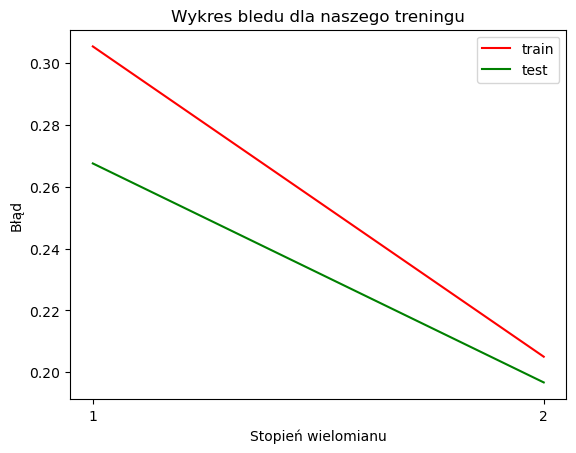

Mean squared error equals: 0.1967088590409412 | And polynomial order is 2


In [66]:
error_train = []
error_test = []
degree_num = 3

for degree in range(1,degree_num):
    
    poly = PolynomialFeatures(degree=degree)
    model = regressor.best_estimator_
    
    x_trans_train = poly.fit_transform(x_train)
    model.fit(x_trans_train, y_train)
        
    error_train.append(mean_squared_error(model.predict(x_trans_train), y_train))
    error_test.append(mean_squared_error(model.predict(poly.fit_transform(x_test)),y_test))
plt.title("Wykres bledu dla naszego treningu")
plt.plot([i for i in range(1,degree_num)],error_train, color='red')
plt.plot([i for i in range(1,degree_num)],error_test, color='green')
plt.xticks([i for i in range(1,degree_num)])
plt.legend(['train','test'])
plt.xlabel("Stopień wielomianu")
plt.ylabel("Błąd")
plt.show()


best = (min(error_test),error_test.index(min(error_test))+1)
print(f"Mean squared error equals: {best[0]} | And polynomial order is {best[1]}")

> *Komentarz:* Widzimy, że błąd, wygląda bardzo dobrze, dla drugiego stopnia wielomianu (wiem, że użyłem tej samej alphy, ale proszę mi wierzyć na słowo, że optymalna alpha dla drugiego stopnia wielomianu nieznacząco odbiegała wynikami od tej alpha, która jest obliczona dla pierwszego stopnia). Od drugiego stopnia w zwyż następuje overfitting(nie pokazałem tego, ale to ze względu na fakt, że algorytm nie osiąga zbieżności, dla stopnia 3 wielomianu)

### Ridge regression

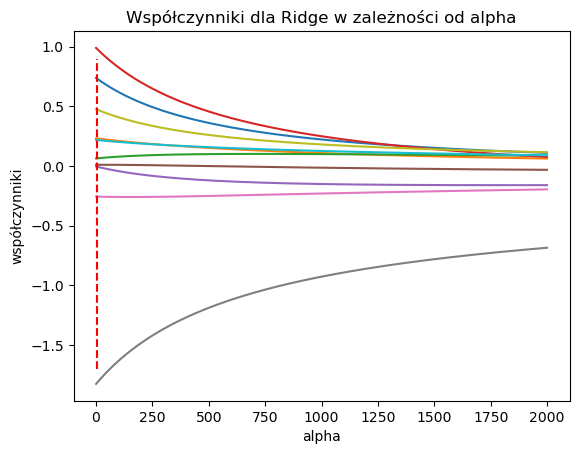

Najlepszy parametr alpha to: 3.1
Lista współczynników: [0.7194838407857755, 0.24068567661197335, 0.07500782105073238, 0.9814422367686202, -0.014626193401218148, 0.008796470561173516, -0.26166312955566845, -1.8086015551277241, 0.4622457600283222, 0.22315538566557158]


In [67]:
lam_val = []
lam_coef = []

range1 = np.arange(0.1,2000,0.5)
for lam in range1:
    model = Ridge(alpha=lam)
    
    model.fit(x_stand, y)
    
    lam_coef.append(model.coef_.tolist())
    lam_val.append(lam)
    
lam_coef = np.array(lam_coef).transpose()
for el in lam_coef:
    plt.plot(lam_val, el)
    
# Finding best parameter using GridSearch
par_alpha = {"alpha": [i for i in range1]} 
regressor = GridSearchCV(Ridge(max_iter=20000), par_alpha, scoring='neg_mean_squared_error', cv=5)
regressor.fit(x_train, y_train)
plt.vlines(regressor.best_params_['alpha'],-1.7,0.9,color='red',linestyles='dashed')
#plt.legend([i for i in range(1,x.shape[1]+1)])
plt.title("Współczynniki dla Ridge w zależności od alpha")
plt.xlabel("alpha")
plt.ylabel("współczynniki")
plt.show()

print(f"Najlepszy parametr alpha to: {regressor.best_params_['alpha']}")
print(f"Lista współczynników: {regressor.best_estimator_.coef_.tolist()}")

> *Komentarz:* Teraz spróbowałem Ridge, raczej nie spodziewam się lepszych wyników aniżeli dla Lasso, dlatego, że tak jak mówiłem, danych jest dużo i wydają się one być dosyć zbite, bez proporcjonalnie dużej liczby outlinerów do ilości danych. A więc widzimy, że współczynniki są podobne, wszystkie one są większe aniżeli w przypadku Lasso. 

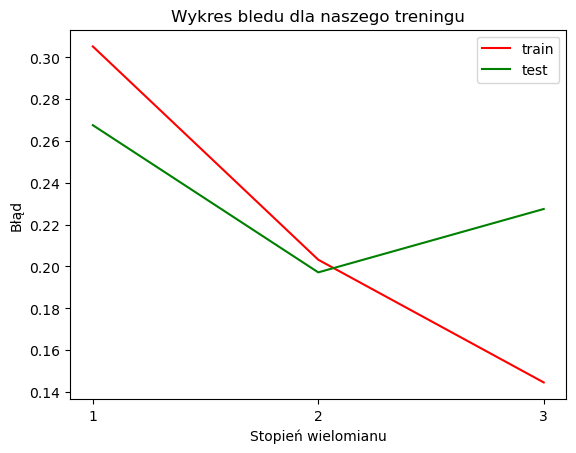

Mean squared error equals: 0.19719086116159656 | And polynomial order is 2


In [68]:
error_train = []
error_test = []

degree_num = 4

for degree in range(1,degree_num):
    poly = PolynomialFeatures(degree=degree)
            
    model = regressor.best_estimator_
    
    x_trans_train = poly.fit_transform(x_train)
    model.fit(x_trans_train, y_train)
        
    error_train.append(mean_squared_error(model.predict(x_trans_train), y_train))
    error_test.append(mean_squared_error(model.predict(poly.fit_transform(x_test)),y_test))
    
plt.title("Wykres bledu dla naszego treningu")
plt.plot([i for i in range(1,degree_num)],error_train, color='red')
plt.plot([i for i in range(1,degree_num)],error_test, color='green')
plt.xticks([i for i in range(1,degree_num)])
plt.legend(['train','test'])
plt.xlabel("Stopień wielomianu")
plt.ylabel("Błąd")
plt.show()


best = (min(error_test),error_test.index(min(error_test))+1)
print(f"Mean squared error equals: {best[0]} | And polynomial order is {best[1]}")

> *Komentarz:* Tak jak przewidywałem, rzeczywiście wynik jest trochę gorszy niż dla Lasso, ale dalej dobry. Widzimy, że od drugiego stopnia wielomiany następuje overfitting. 

### Regresja liniowa - bez regularyzacji

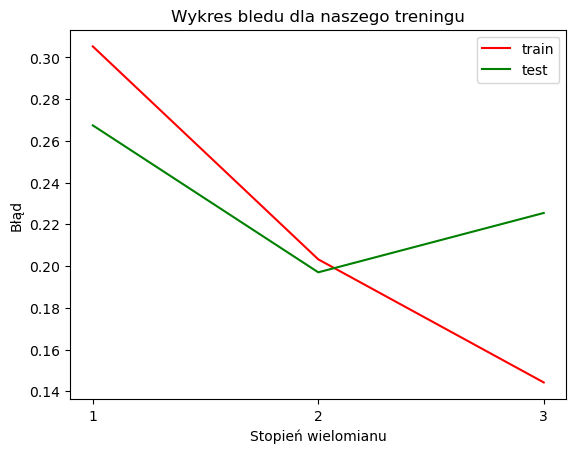

Mean squared error equals: 0.1969831806568671 | And polynomial order is 2
Lista współczynników: [0.0, 0.7247459338333921, 0.24160470663890385, 0.07426871520478737, 0.9887508174160067, -0.012869807422650181, 0.008711261035017253, -0.26140722073970585, -1.81716925952852, 0.4652641069152918, 0.2239370138645402]


In [69]:
error_train = []
error_test = []
coef = ...

degree_num = 4

for degree in range(1,degree_num):
    poly = PolynomialFeatures(degree=degree)
            
    model = LinearRegression()
    
    x_trans_train = poly.fit_transform(x_train)
    model.fit(x_trans_train, y_train)
        
    error_train.append(mean_squared_error(model.predict(x_trans_train), y_train))
    error_test.append(mean_squared_error(model.predict(poly.fit_transform(x_test)),y_test))
    
    if degree == 1: coef = model.coef_.tolist()
    
plt.title("Wykres bledu dla naszego treningu")
plt.plot([i for i in range(1,degree_num)],error_train, color='red')
plt.plot([i for i in range(1,degree_num)],error_test, color='green')
plt.xticks([i for i in range(1,degree_num)])
plt.legend(['train','test'])
plt.xlabel("Stopień wielomianu")
plt.ylabel("Błąd")
plt.show()


best = (min(error_test),error_test.index(min(error_test))+1)
print(f"Mean squared error equals: {best[0]} | And polynomial order is {best[1]}")
print(f"Lista współczynników: {coef}")

> *Komentarz:* Podobnie jak w Ridge i Lasso następuje zbyt duże dopasowanie do danych od drugiego stopnia. Współczynniki są bardzo podobne jak w Ridge, z wyjatkiem wyzerowanego pierwszego współczynnika(wiem, że również mogłem pomijać go w moim trenowaniu modelu, ale nie mam danych scentrowanych wokół zera). Istotnie wynik jest o lepszy niż w przypadku Ridge. W tym miejscu mogę reasumować: najlepiej wypadło Lasso, następnie Regresja bez regularyzacji i dopiero na końcu Ridge, jednakże różnica błedu między nimi jest niewielka. Moim zdaniem, Lasso działa lepiej ze względu na fakt, że mamy dużo wejść, które dzięki regularyzacji L2 są lepiej minimalizowane, ponieważ stara się ona wyzerować najmniej znaczące współczynniki, poprawiając przy tym ogólną precyzję modelu, ponieważ Ridge stara się jedynie zoptymalizować jak najlepiej balans wariancja-bias wychodzi mu to trochę gorzej.